In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv(r'/content/personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [36]:
df.shape

(2900, 8)

In [37]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [39]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [40]:
df.dropna(inplace=True)

In [41]:
df.skew(numeric_only=True)

,0
Time_spent_Alone,0.382624
Social_event_attendance,0.306124
Going_outside,0.196761
Friends_circle_size,0.422495
Post_frequency,0.475082


In [42]:
df['Stage_fear'] = pd.get_dummies(df['Stage_fear'], dtype=int, drop_first=True)['Yes']
display(df.head())

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,1,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,1,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,0,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,0,9.0,4.0,No,8.0,5.0,Extrovert


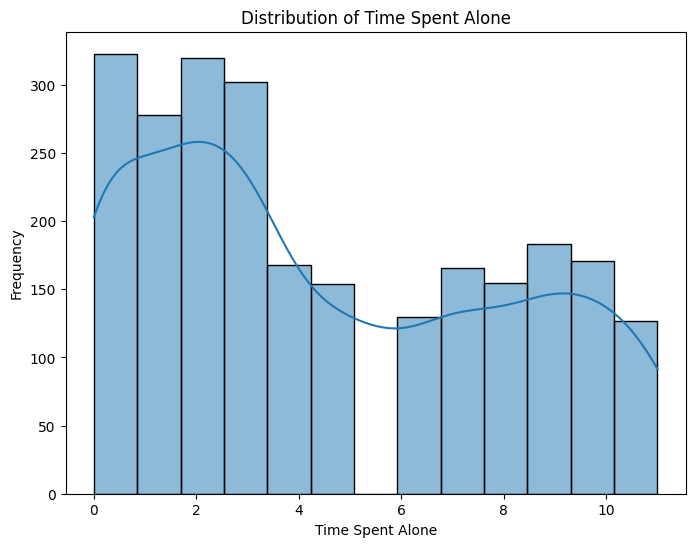

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Time_spent_Alone', kde=True)
plt.title('Distribution of Time Spent Alone')
plt.xlabel('Time Spent Alone')
plt.ylabel('Frequency')
plt.show()

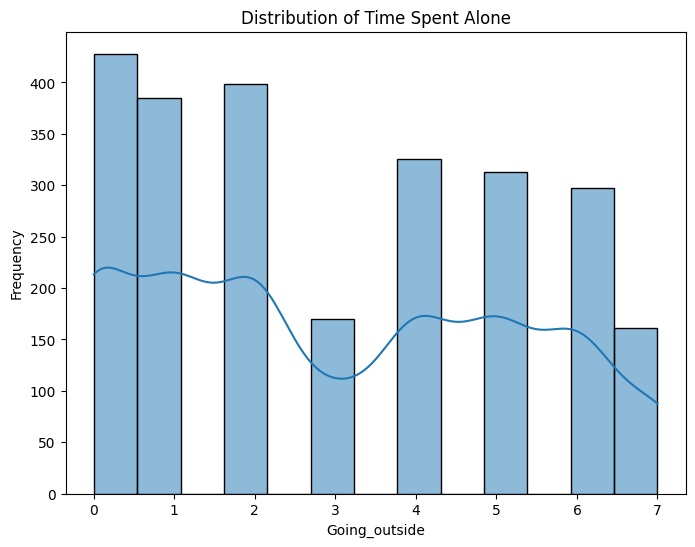

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Going_outside', kde=True)
plt.title('Distribution of Time Spent Alone')
plt.xlabel('Going_outside')
plt.ylabel('Frequency')
plt.show()

In [45]:
df['Drained_after_socializing'] = pd.get_dummies(df['Drained_after_socializing'], dtype=int, drop_first=True)['Yes']
display(df.head())

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,Extrovert
1,9.0,1,0.0,0.0,1,0.0,3.0,Introvert
2,9.0,1,1.0,2.0,1,5.0,2.0,Introvert
3,0.0,0,6.0,7.0,0,14.0,8.0,Extrovert
4,3.0,0,9.0,4.0,0,8.0,5.0,Extrovert


In [46]:
personality_dummies = pd.get_dummies(df['Personality'], dtype=int)
personality_dummies.head()

,Extrovert,Introvert
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [47]:
result_df = pd.concat([df, personality_dummies], axis=1)
result_df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Extrovert,Introvert
0,4.0,0,4.0,6.0,0,13.0,5.0,Extrovert,1,0
1,9.0,1,0.0,0.0,1,0.0,3.0,Introvert,0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,Introvert,0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,Extrovert,1,0
4,3.0,0,9.0,4.0,0,8.0,5.0,Extrovert,1,0


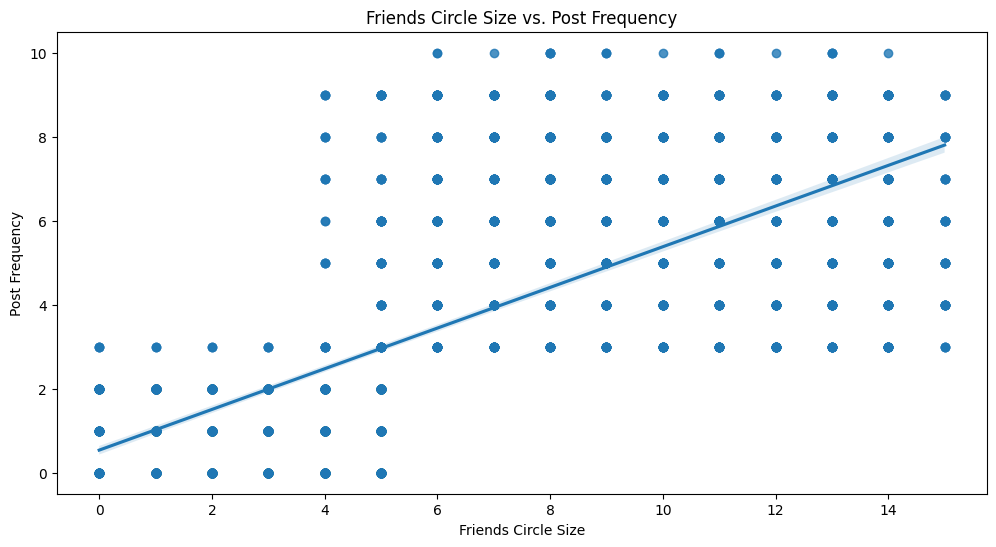

In [48]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Friends_circle_size', y='Post_frequency')
plt.title('Friends Circle Size vs. Post Frequency')
plt.xlabel('Friends Circle Size')
plt.ylabel('Post Frequency')
plt.show()

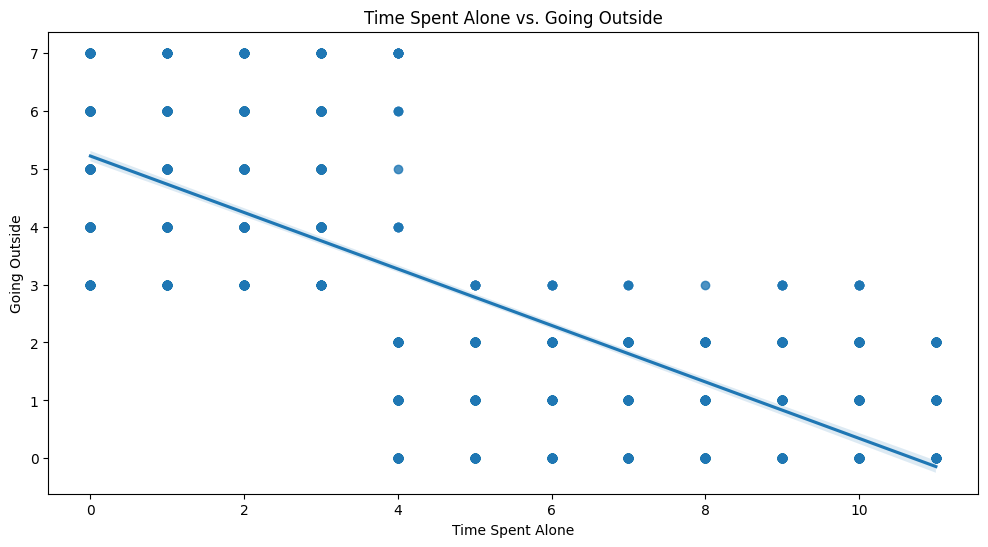

In [49]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Time_spent_Alone', y='Going_outside')
plt.title('Time Spent Alone vs. Going Outside')
plt.xlabel('Time Spent Alone')
plt.ylabel('Going Outside')
plt.show()

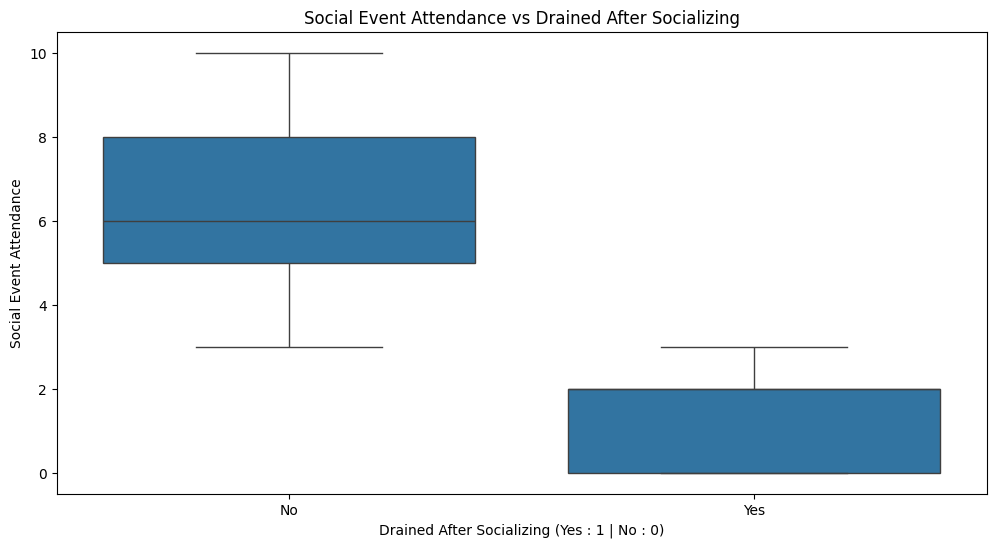

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Drained_after_socializing', y='Social_event_attendance')
plt.title('Social Event Attendance vs Drained After Socializing')
plt.xlabel('Drained After Socializing (Yes : 1 | No : 0)')
plt.ylabel('Social Event Attendance')
plt.xticks([1, 0], ['Yes', 'No'])
plt.show()

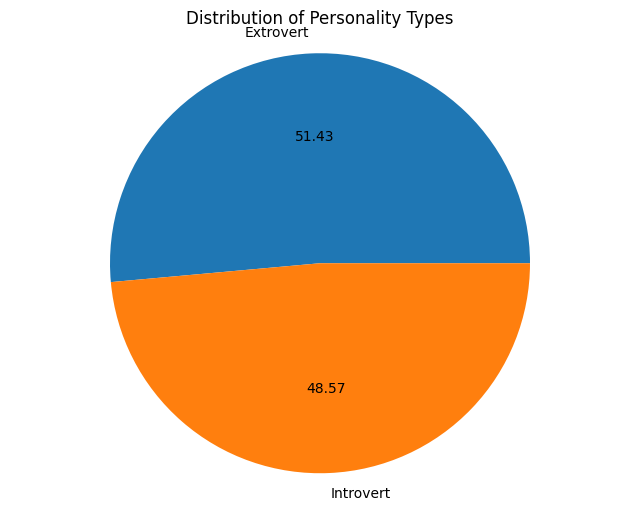

In [51]:
personality_counts = df['Personality'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(personality_counts, labels=personality_counts.index, autopct='%.2f', startangle=0)
plt.title('Distribution of Personality Types')
plt.axis('equal')
plt.show()

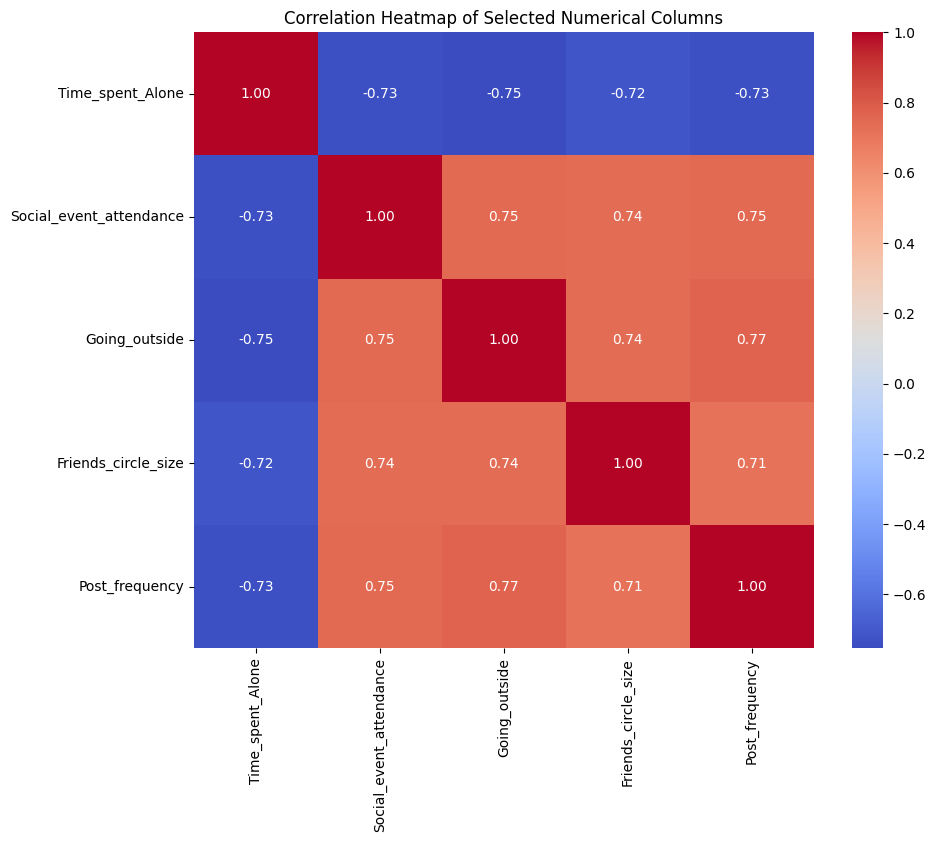

In [52]:
columns = df[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(columns, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Numerical Columns')
plt.show()